In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque

import matplotlib.pyplot as plt
from MADDPG_Agent import MADDPG
import torch

import random

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64\Tennis_Windows_x86_64\Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [5]:
MADDPG_Agent = MADDPG(seed=2, noise_start=0.5, update_every=2, gamma=0.99, t_stop_noise=30000)   
    
print(type(MADDPG_Agent))

<class 'MADDPG_Agent.MADDPG'>


In [6]:
numagents =2 

agentslist = np.zeros(numagents)

for i in range(len(agentslist)):
    MADDPG_Agent.agents[i].actor_local.load_state_dict(torch.load('checkpoint_actor_agent_'+str(i)+'.pth'))
    MADDPG_Agent.agents[i].critic_local.load_state_dict(torch.load('checkpoint_critic_agent_'+str(i)+'.pth'))
    

In [7]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
states = env_info.vector_observations           # get the current state (for each agent)
#scores = np.zeros(num_agents)                   # initialize the score (for each agent)
#scoreslist = []                        # list containing scores from each episode

#for i in range(1, 6): 

scores = []
scores_deque = deque(maxlen=100)
scores_avg = []

num_episodes = 5

for i in range(1, num_episodes+1):                                      # play game for 30 episodes

    #env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    #states = env_info.vector_observations           # get the current state (for each agent)
    scorestab = np.zeros(num_agents)                   # initialize the score (for each agent)
    #scoreslist = []                        # list containing scores from each episode
    
    rewardslist = []
    #env_info = env.reset(train_mode=False)[brain_name]    # reset the environment    
    #states = env_info.vector_observations                  # get the current state (for each agent)


    while True:
        actions = MADDPG_Agent.act(states,i)# select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scorestab += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        #scoreslist.append(scores)
        rewardslist.append(rewards)
        if np.any(dones):                                  # exit loop if episode finished
            break
    
    episode_reward = np.max(np.sum(np.array(rewardslist),axis=0))
        
    scores.append(episode_reward)             # save most recent score to overall score array
    scores_deque.append(episode_reward)       # save most recent score to running window of 100 last scores
    current_avg_score = np.mean(scores_deque)
    scores_avg.append(current_avg_score)      # save average of last 100 scores to average score array
    
    print('\rEpisode {}\tAverage Score: {:.3f}'.format(i, current_avg_score),end="")
    
    print("\n")
    
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scorestab)))
    
    print("\n")
            
    #print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

E:\Anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 1	Average Score: 2.600

Score (max over agents) from episode 1: 2.600000038743019


Episode 2	Average Score: 1.650

Score (max over agents) from episode 2: 0.7000000104308128


Episode 3	Average Score: 1.897

Score (max over agents) from episode 3: 2.3900000378489494


Episode 4	Average Score: 1.473

Score (max over agents) from episode 4: 0.20000000298023224


Episode 5	Average Score: 1.218

Score (max over agents) from episode 5: 0.20000000298023224




When finished, you can close the environment.

In [8]:
env.close()

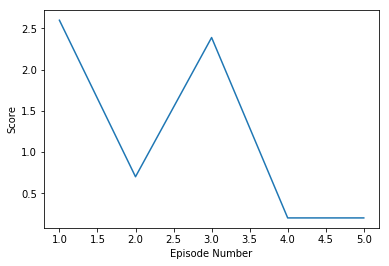

In [9]:
# plot the scores
#fig = plt.figure()
#ax = fig.add_subplot(111)
#plt.plot(np.arange(1,len(scoreslist)+1), scoreslist)
#plt.ylabel('Score')
#plt.xlabel('Episode #')
#plt.show()


fig = plt.figure()
ax= fig.add_subplot(111)
plt.plot(np.arange(1,len(scores)+1),scores)
plt.ylabel('Score')
plt.xlabel('Episode Number')
plt.show()